<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.17
Notebook id          : MNIST1
Run time             : Monday 01 March 2021, 18:41:57
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

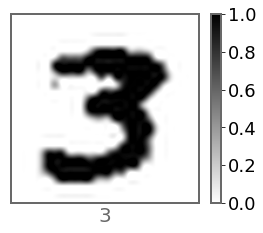

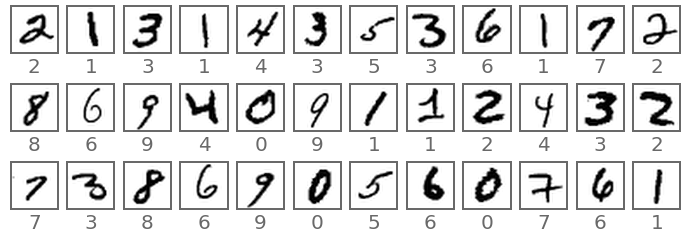

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 1:34 - loss: 2.3281 - accuracy: 0.0879

 29/118 [======>.......................] - ETA: 0s - loss: 1.7792 - accuracy: 0.4922  

 57/118 [=============>................] - ETA: 0s - loss: 1.4056 - accuracy: 0.6139

 85/118 [====================>.........] - ETA: 0s - loss: 1.1890 - accuracy: 0.6769

114/118 [===========================>..] - ETA: 0s - loss: 1.0432 - accuracy: 0.7178

118/118 [==============================] - 2s 9ms/step - loss: 1.0230 - accuracy: 0.7234 - val_loss: 0.2392 - val_accuracy: 0.9312


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9199

 29/118 [======>.......................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9275

 57/118 [=============>................] - ETA: 0s - loss: 0.2331 - accuracy: 0.9311

 86/118 [====================>.........] - ETA: 0s - loss: 0.2276 - accuracy: 0.9332

114/118 [===========================>..] - ETA: 0s - loss: 0.2236 - accuracy: 0.9347

118/118 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9349 - val_loss: 0.1755 - val_accuracy: 0.9481


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9453

 29/118 [======>.......................] - ETA: 0s - loss: 0.1663 - accuracy: 0.9523

 59/118 [==============>...............] - ETA: 0s - loss: 0.1648 - accuracy: 0.9527

 88/118 [=====================>........] - ETA: 0s - loss: 0.1633 - accuracy: 0.9531

118/118 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9536

118/118 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9536 - val_loss: 0.1513 - val_accuracy: 0.9558


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1425 - accuracy: 0.9492

 30/118 [======>.......................] - ETA: 0s - loss: 0.1330 - accuracy: 0.9602

 59/118 [==============>...............] - ETA: 0s - loss: 0.1322 - accuracy: 0.9604

 88/118 [=====================>........] - ETA: 0s - loss: 0.1303 - accuracy: 0.9610

118/118 [==============================] - ETA: 0s - loss: 0.1290 - accuracy: 0.9615

118/118 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9615 - val_loss: 0.1250 - val_accuracy: 0.9635


Epoch 5/16


  1/118 [..............................] - ETA: 0s - loss: 0.1175 - accuracy: 0.9551

 29/118 [======>.......................] - ETA: 0s - loss: 0.1053 - accuracy: 0.9673

 58/118 [=============>................] - ETA: 0s - loss: 0.1047 - accuracy: 0.9682

 86/118 [====================>.........] - ETA: 0s - loss: 0.1044 - accuracy: 0.9687

115/118 [============================>.] - ETA: 0s - loss: 0.1040 - accuracy: 0.9690

118/118 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9691 - val_loss: 0.1108 - val_accuracy: 0.9659


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.1008 - accuracy: 0.9590

 28/118 [======>.......................] - ETA: 0s - loss: 0.0892 - accuracy: 0.9722

 56/118 [=============>................] - ETA: 0s - loss: 0.0869 - accuracy: 0.9738

 84/118 [====================>.........] - ETA: 0s - loss: 0.0870 - accuracy: 0.9739

113/118 [===========================>..] - ETA: 0s - loss: 0.0873 - accuracy: 0.9739

118/118 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9739 - val_loss: 0.1039 - val_accuracy: 0.9688


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.0460 - accuracy: 0.9844

 30/118 [======>.......................] - ETA: 0s - loss: 0.0681 - accuracy: 0.9815

 59/118 [==============>...............] - ETA: 0s - loss: 0.0713 - accuracy: 0.9799

 88/118 [=====================>........] - ETA: 0s - loss: 0.0729 - accuracy: 0.9791

117/118 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9787

118/118 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9787 - val_loss: 0.0958 - val_accuracy: 0.9707


Epoch 8/16


  1/118 [..............................] - ETA: 0s - loss: 0.0382 - accuracy: 0.9902

 30/118 [======>.......................] - ETA: 0s - loss: 0.0641 - accuracy: 0.9815

 59/118 [==============>...............] - ETA: 0s - loss: 0.0641 - accuracy: 0.9813

 88/118 [=====================>........] - ETA: 0s - loss: 0.0641 - accuracy: 0.9813

117/118 [============================>.] - ETA: 0s - loss: 0.0643 - accuracy: 0.9811

118/118 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9811 - val_loss: 0.0922 - val_accuracy: 0.9724


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0676 - accuracy: 0.9824

 30/118 [======>.......................] - ETA: 0s - loss: 0.0577 - accuracy: 0.9834

 58/118 [=============>................] - ETA: 0s - loss: 0.0575 - accuracy: 0.9833

 87/118 [=====================>........] - ETA: 0s - loss: 0.0573 - accuracy: 0.9833

116/118 [============================>.] - ETA: 0s - loss: 0.0576 - accuracy: 0.9831

118/118 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.0939 - val_accuracy: 0.9719


Epoch 10/16


  1/118 [..............................] - ETA: 0s - loss: 0.0455 - accuracy: 0.9883

 30/118 [======>.......................] - ETA: 0s - loss: 0.0541 - accuracy: 0.9848

 59/118 [==============>...............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9849

 88/118 [=====================>........] - ETA: 0s - loss: 0.0522 - accuracy: 0.9849

116/118 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9849

118/118 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0900 - val_accuracy: 0.9734


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0294 - accuracy: 0.9883

 30/118 [======>.......................] - ETA: 0s - loss: 0.0465 - accuracy: 0.9855

 59/118 [==============>...............] - ETA: 0s - loss: 0.0464 - accuracy: 0.9859

 87/118 [=====================>........] - ETA: 0s - loss: 0.0464 - accuracy: 0.9860

115/118 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9862

118/118 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0854 - val_accuracy: 0.9744


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0380 - accuracy: 0.9883

 30/118 [======>.......................] - ETA: 0s - loss: 0.0435 - accuracy: 0.9869

 59/118 [==============>...............] - ETA: 0s - loss: 0.0433 - accuracy: 0.9870

 88/118 [=====================>........] - ETA: 0s - loss: 0.0427 - accuracy: 0.9872

118/118 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9874

118/118 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.0829 - val_accuracy: 0.9757


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0297 - accuracy: 0.9922

 30/118 [======>.......................] - ETA: 0s - loss: 0.0332 - accuracy: 0.9901

 59/118 [==============>...............] - ETA: 0s - loss: 0.0344 - accuracy: 0.9900

 89/118 [=====================>........] - ETA: 0s - loss: 0.0350 - accuracy: 0.9900

118/118 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0801 - val_accuracy: 0.9757


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0283 - accuracy: 0.9863

 30/118 [======>.......................] - ETA: 0s - loss: 0.0234 - accuracy: 0.9937

 60/118 [==============>...............] - ETA: 0s - loss: 0.0256 - accuracy: 0.9930

 89/118 [=====================>........] - ETA: 0s - loss: 0.0269 - accuracy: 0.9926

118/118 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9924

118/118 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.0841 - val_accuracy: 0.9759


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0285 - accuracy: 0.9961

 30/118 [======>.......................] - ETA: 0s - loss: 0.0298 - accuracy: 0.9919

 59/118 [==============>...............] - ETA: 0s - loss: 0.0293 - accuracy: 0.9918

 88/118 [=====================>........] - ETA: 0s - loss: 0.0291 - accuracy: 0.9918

118/118 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9919

118/118 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9919 - val_loss: 0.0786 - val_accuracy: 0.9770


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0161 - accuracy: 1.0000

 30/118 [======>.......................] - ETA: 0s - loss: 0.0238 - accuracy: 0.9948

 60/118 [==============>...............] - ETA: 0s - loss: 0.0234 - accuracy: 0.9946

 89/118 [=====================>........] - ETA: 0s - loss: 0.0233 - accuracy: 0.9944

115/118 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9943

118/118 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9943 - val_loss: 0.0793 - val_accuracy: 0.9772


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.07934584468603134
Test accuracy : 0.9771999716758728


### 6.2 - Plot history

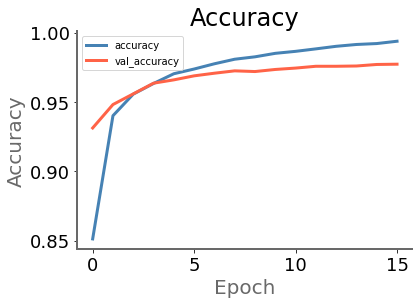

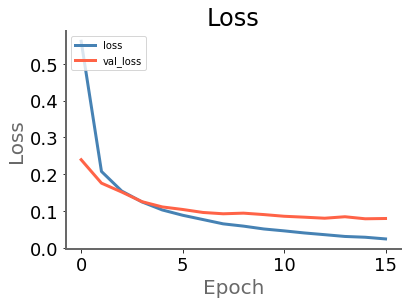

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

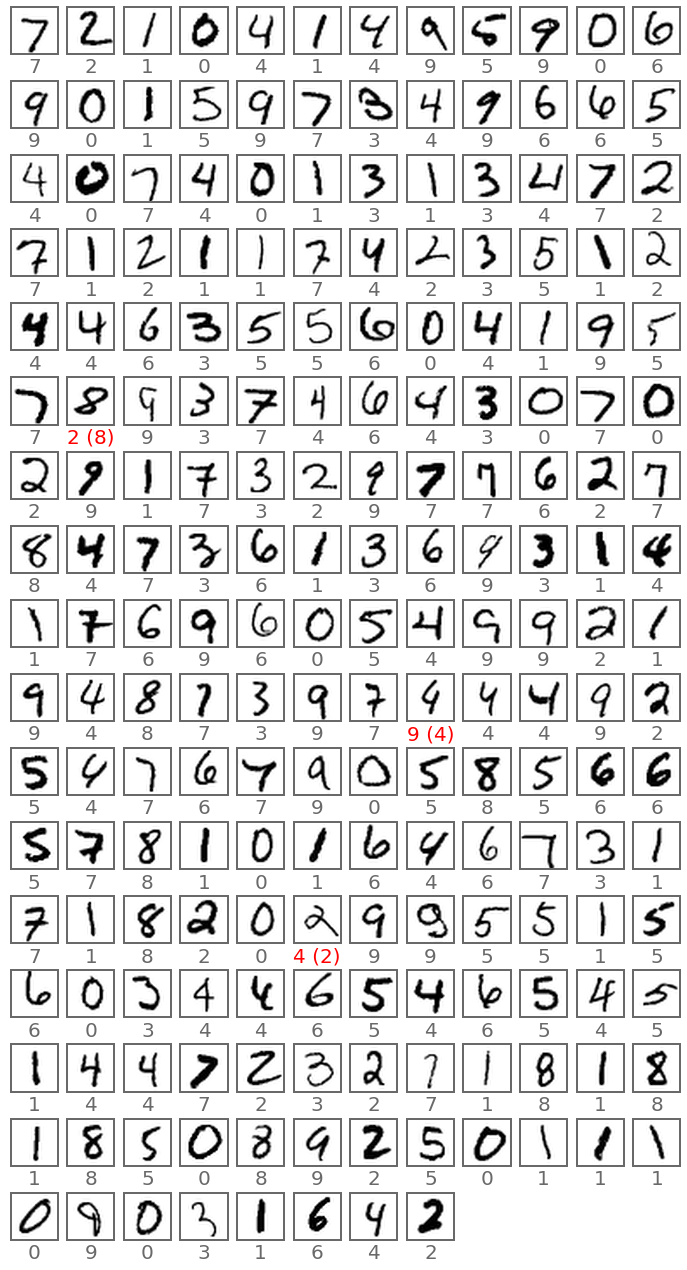

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

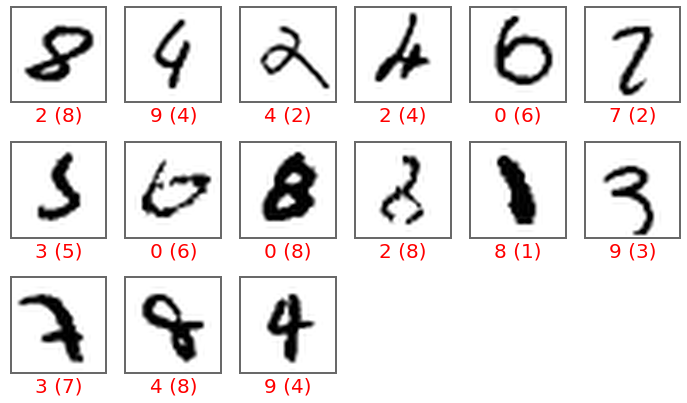

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

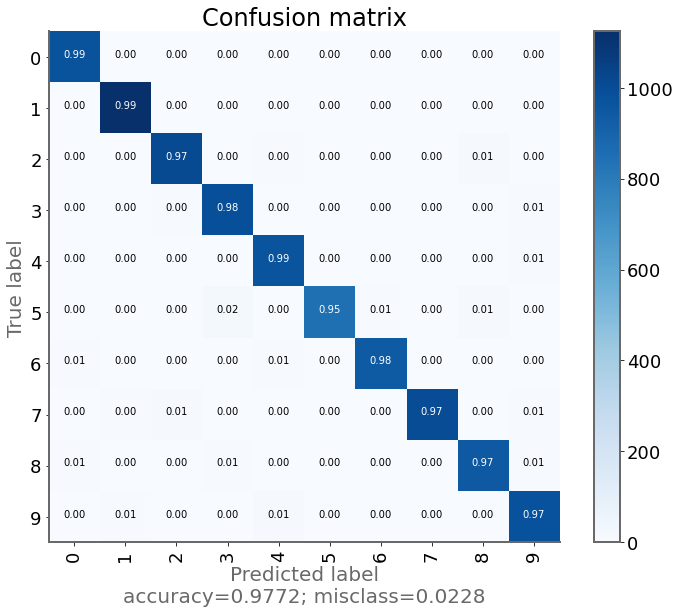

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Monday 01 March 2021, 18:42:40
Duration is : 00:00:43 903ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>